In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk
from spacy import displacy

In [4]:
df_raw = pd.read_csv('../data/raw/trump_tweets.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20761 entries, 0 to 20760
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   source                   20761 non-null  object 
 1   id_str                   20761 non-null  int64  
 2   text                     20761 non-null  object 
 3   created_at               20761 non-null  object 
 4   retweet_count            20761 non-null  int64  
 5   in_reply_to_user_id_str  2442 non-null   float64
 6   favorite_count           20761 non-null  int64  
 7   is_retweet               20761 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 1.1+ MB


In [5]:
df_raw.sample(10)

,source,id_str,text,created_at,retweet_count,in_reply_to_user_id_str,favorite_count,is_retweet
16397,Twitter for iPhone,759013928315686917,CAMPAIGN STATEMENT: \nhttps://t.co/RNW3ED2ifR,2016-07-29T13:13:16Z,3863,NaN,10688,False
12943,Twitter for Android,654101562948763648,Can anyone imagine Chafee as president? No way.,2015-10-14T01:08:59Z,3441,NaN,8662,False
1360,Twitter Web Client,273520503090733056,The Muslim Brotherhood dictator in Egypt is ba...,2012-11-27T20:15:44Z,234,NaN,89,False
12573,Twitter for iPhone,667509225535311872,Kasich has already spent $6 million on ads in ...,2015-11-20T01:06:15Z,1263,NaN,3667,False
12422,Twitter for Android,672787852246319104,.@CNN &amp; @CNNPolitics Please thank Alisyn C...,2015-12-04T14:41:38Z,952,NaN,2625,False
7078,Twitter Web Client,327504327335886848,Dangerous. While Obama is cutting down our mil...,2013-04-25T19:28:11Z,160,NaN,46,False
17646,Twitter for Android,708720448335437824,The last person that Hillary or Bernie want to...,2016-03-12T18:24:56Z,7478,NaN,20991,False
6890,Twitter Web Client,332128943668858880,People do not assume this but more than anythi...,2013-05-08T13:44:45Z,125,NaN,113,False
8926,Twitter Web Client,299190557794775040,@PIERPAOLOMONNI @UncleRUSH Thanks.,2013-02-06T16:19:22Z,0,483341312.0,1,False
3237,Twitter Web Client,212974309101154304,"Once again, @Cher tweets nonsense about @MittR...",2012-06-13T18:26:46Z,202,NaN,97,False


In [18]:
nlp = spacy.load("en_core_web_trf")

In [7]:
# Tokenization

sentence = nlp.tokenizer("I live in Costa Rica")
print(f"Number of tokens: {len(sentence)}")

Number of tokens: 5


In [8]:
for word in sentence:
    print(word)

I
live
in
Costa
Rica


In [13]:
# POS = Part of Speech (tagging)

sentence2 = nlp("The most populated city in Costa Rica is San Jose.")
for token in sentence2:
    print(token.text, token.pos_)

# DET : determinative
# ADV : adverb
# ADJ : adjective
# ADP : adposition
# PROPN : proper noun
# AUX : auxiliar (to be, to have, will, should)
# PUNCT : punctuation

The DET
most ADV
populated ADJ
city NOUN
in ADP
Costa PROPN
Rica PROPN
is AUX
San PROPN
Jose PROPN
. PUNCT


In [14]:
# DEP = Dependence parsing

for token in sentence2:
    print(token.text, token.dep_)

# det : determiner
# advmod : adverbial modifier
# amod : adjective modifier
# nsubj : nominal subject
# prep : preposition
# pobj : proper object
# ROOT : root word
# atrr : attribution

The det
most advmod
populated amod
city nsubj
in prep
Costa compound
Rica pobj
is ROOT
San compound
Jose attr
. punct


In [19]:
displacy.render(sentence2)

In [12]:
df_processed = df_raw.copy()
df_processed = df_processed.drop(['id_str','is_retweet','in_reply_to_user_id_str'],axis=1)
df_processed['created_at'] = pd.to_datetime(df_processed.created_at)
df_processed.source = pd.Categorical(df_processed.source)
df_processed = df_processed.loc[(df_processed.created_at >= '2015-06-17') & (df_processed.created_at <= '2016-11-08')]
df_processed.created_at += pd.Timedelta(-5,unit='h')
df_processed = df_processed.loc[(df_processed.source.str.contains('iPhone')) | (df_processed.source.str.contains('Android'))]
df_processed.source = df_processed.source.cat.remove_unused_categories()
df_processed.to_csv('../trump_tweets_processed.csv')

In [13]:
df = df_processed.copy()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3946 entries, 12072 to 18506
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   source          3946 non-null   category           
 1   text            3946 non-null   object             
 2   created_at      3946 non-null   datetime64[ns, UTC]
 3   retweet_count   3946 non-null   int64              
 4   favorite_count  3946 non-null   int64              
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 158.0+ KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
retweet_count,3946.0,5839.465281,6156.818896,61.0,2013.25,4162.5,7807.25,168765.0
favorite_count,3946.0,15666.982767,14650.408743,167.0,5350.00,11981.5,21527.00,297281.0


In [16]:
df.source.value_counts()

source
Twitter for iPhone     2099
Twitter for Android    1847
Name: count, dtype: int64

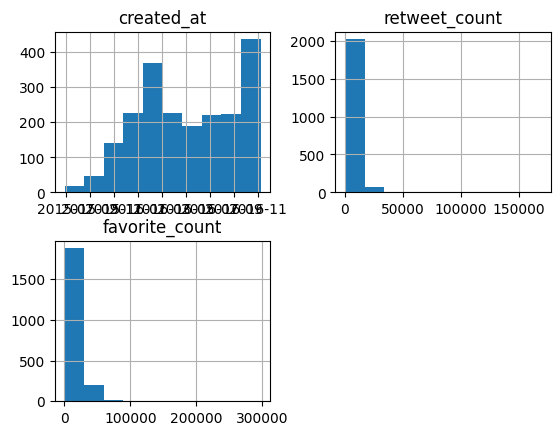

In [11]:
df = df[(df.source == 'Twitter for iPhone') | (df.source == 'Twitterr for Android')].copy()
df.hist()
plt.show()

/tmp/ipykernel_1469/1253197773.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['source','hour'])
/tmp/ipykernel_1469/1253197773.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .assign(rate=lambda df: df['count']/df.groupby('source')['count'].sum())
/workspaces/nlp_task/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/workspaces/nlp_task/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498

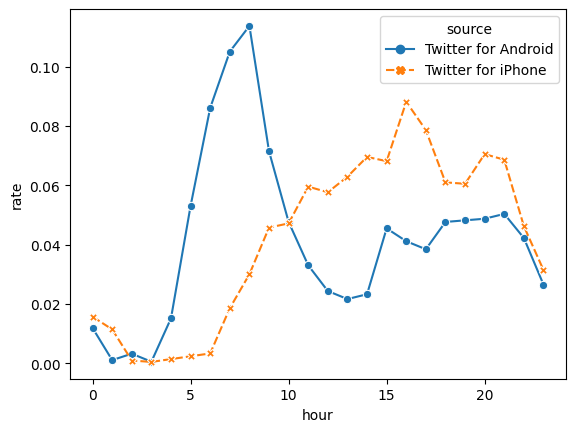

In [17]:
df_plot = (df
           .assign(hour=df.created_at.dt.hour)
           .groupby(['source','hour'])
           .agg(count=('source','count'))
           .assign(rate=lambda df: df['count']/df.groupby('source')['count'].sum())
           .reset_index()
)

sns.lineplot(data=df_plot,x='hour',y='rate',hue='source',markers=True,style='source')
plt.show()

In [18]:
df.sort_values(by='retweet_count',ascending=False)[['text','retweet_count']][:10]

,text,retweet_count
16875,How long did it take your staff of 823 people ...,168765
17183,Happy #CincoDeMayo! The best taco bowls are ma...,85465
15333,MAKE AMERICA GREAT AGAIN!,59098
15758,Here is my statement. https://t.co/WAZiGoQqMQ,51891
16548,Such a great honor to be the Republican Nomine...,41616
15340,If Obama worked as hard on straightening out o...,41479
15827,For those few people knocking me for tweeting ...,40850
15756,The media and establishment want me out of the...,40772
16583,I am pleased to announce that I have chosen Go...,38782
16848,Is President Obama going to finally mention th...,38456
